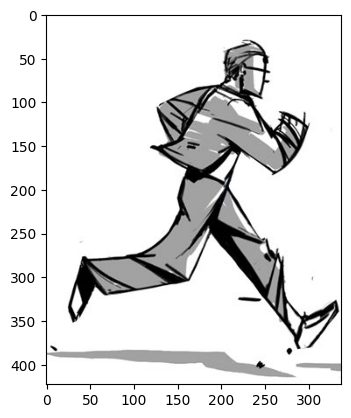

In [9]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import colorsys

plt.imshow(Image.open('test.png'))
plt.show()

Loaded 5 images from images


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

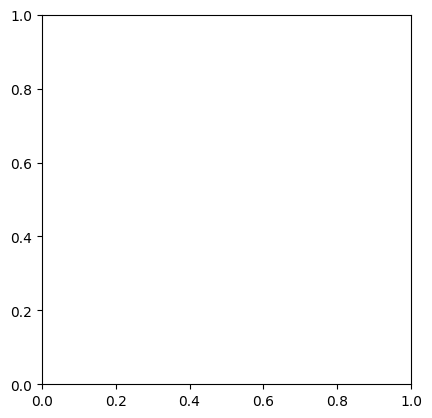

In [23]:
def resize_image(image, size):
    return image.resize(size, Image.ADAPTIVE)

def average_color(image):
    np_image = np.array(image)
    w, h, d = np_image.shape
    return tuple(np.average(np_image.reshape(w * h, d), axis=0))

def load_images_from_folder(folder, size):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            with Image.open(img_path) as img:
                resized_img = resize_image(img, size)
                images.append((resized_img, average_color(resized_img)))
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    return images

def pixelate_image(image, pixel_size):
    width, height = image.size
    num_pixels_width = width // pixel_size
    num_pixels_height = height // pixel_size
    img_small = image.resize((num_pixels_width, num_pixels_height), Image.NEAREST)
    img_pixelated = img_small.resize((width, height), Image.NEAREST)
    return img_pixelated, num_pixels_width, num_pixels_height

def find_closest_image(color, images):
    min_diff = float('inf')
    closest_image = None
    for img, img_color in images:
        diff = np.linalg.norm(np.array(img_color) - np.array(color))
        if diff < min_diff:
            min_diff = diff
            closest_image = img
    return closest_image

def create_mosaic(image, images, pixel_size):
    pixelated_image, num_pixels_width, num_pixels_height = pixelate_image(image, pixel_size)
    mosaic_image = Image.new('RGB', (num_pixels_width * pixel_size, num_pixels_height * pixel_size))
    
    for y in range(num_pixels_height):
        for x in range(num_pixels_width):
            pixel_color = pixelated_image.getpixel((x * pixel_size, y * pixel_size))
            closest_img = find_closest_image(pixel_color, images)
            mosaic_image.paste(closest_img, (x * pixel_size, y * pixel_size))
    
    return mosaic_image

if __name__ == "__main__":
    folder_path = "images"
    target_image_path = 'test.jpg'
    pixel_size = 30  # Each pixel corresponds to a 30x30 image

    # Load and resize images from the folder
    images = load_images_from_folder(folder_path, (pixel_size, pixel_size))
    print(f"Loaded {len(images)} images from {folder_path}")
    for i in images:
        plt.imshow(images[i])
        plt.show()



    # Open and process the target image
    with Image.open(target_image_path) as target_image:
        target_image = target_image.convert('RGB')
        mosaic_image = create_mosaic(target_image, images, pixel_size)
        mosaic_image.show()  # Display the mosaic image
        mosaic_image.save("mosaic_image.png")  # Save the mosaic image